## Lending Club Case Study Assignmanet

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format

# set display of rows & columns
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)

# Regular expressions for string manipulation
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv("loan.csv", dtype='unicode')

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [5]:
loan.dtypes

id                                object
member_id                         object
loan_amnt                         object
funded_amnt                       object
funded_amnt_inv                   object
term                              object
int_rate                          object
installment                       object
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        object
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                             object
zip_code                          object
addr_state                        object
dti             

In [6]:
# Checking null values for columns
loan.isnull().all(axis=0).sum()

54

In [7]:
# Checking null values for columns
loan.isnull().all(axis=1).sum()

0

In [8]:
(100*loan.isnull().sum() / len(loan.index)).sort_values(ascending = False)

total_il_high_credit_limit       100.00
mo_sin_old_rev_tl_op             100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00
total_bc_limit                   100.00
dti_joint                        100.00


In [9]:
# getting all columns which have null values
loan.columns[loan.isnull().all(axis=0)]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
# Dropping all the columns which have 100% null values
loan.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis = 1, inplace=True )

In [11]:
loan.shape

(39717, 57)

In [12]:
(100*loan.isnull().sum() / len(loan.index)).sort_values(ascending = False)

next_pymnt_d                 97.13
mths_since_last_record       92.99
mths_since_last_delinq       64.66
desc                         32.58
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
collection_recovery_fee       0.00
acc_now_delinq                0.00
application_type              0.00
url                           0.00
pymnt_plan                    0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
delinq_amnt                   0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate            

In [13]:
# dropping columns which has more than 60% null values
loan.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis = 1, inplace=True)

In [14]:
loan[['tax_liens']].describe()

,tax_liens
count,39678
unique,1
top,0
freq,39678


In [15]:
#dropping all columns whihc has single value
loan.drop(['pymnt_plan','collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','initial_list_status'], axis = 1, inplace=True)

In [16]:
loan.shape

(39717, 45)

In [17]:
# dropping this column which is not useful in analysis
loan.drop(['id', 'member_id', 'url', 'zip_code', 'desc', 'emp_title', 'title'], axis=1, inplace=True)

In [18]:
# Dropping all the columns which are customer behavioural 
loan.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis = 1, inplace=True)

In [19]:
loan.shape

(39717, 18)

In [20]:
(100 * loan.isnull().sum() / len(loan.index)).sort_values(ascending = False)

emp_length             2.71
pub_rec_bankruptcies   1.75
addr_state             0.00
purpose                0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
annual_inc             0.00
home_ownership         0.00
dti                    0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
term                   0.00
funded_amnt_inv        0.00
funded_amnt            0.00
loan_amnt              0.00
dtype: float64

In [21]:
loan['emp_length']

loan['emp_length'] = loan.emp_length.str.rstrip('years ')
loan['emp_length'] = loan.emp_length.str.rstrip('+ ')
loan['emp_length'] = loan['emp_length'].apply(lambda x: 0.5 if x == '< 1' else x)


In [22]:
loan.emp_length.isnull().sum()

1075

In [23]:
loan['emp_length'] = loan['emp_length'].fillna(0)

In [24]:
loan.emp_length.isnull().sum()

0

In [25]:
(loan.isnull().sum() * 100 / len(loan.index)).sort_values(ascending = False)

pub_rec_bankruptcies   1.75
dti                    0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
loan_amnt              0.00
dtype: float64

In [26]:
loan['pub_rec_bankruptcies'].unique()

array(['0', '1', '2', nan], dtype=object)

In [27]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna('Unknown')

In [28]:
loan['pub_rec_bankruptcies'].isnull().sum()

0

In [29]:
(loan.isnull().sum() * 100 / len(loan.index)).sort_values(ascending = False)

pub_rec_bankruptcies   0.00
dti                    0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
loan_amnt              0.00
dtype: float64

In [30]:
loan.shape

(39717, 18)

In [31]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,0.50,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,RENT,80000,Source Verified,Dec-11,Current,other,OR,17.94,0


In [32]:
loan['term'] = loan['term'].str.rstrip('months')

In [33]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

In [34]:
float_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']

loan[float_columns] = loan[float_columns].astype(np.float)

In [35]:
loan.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                    float64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length              float64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies     object
dtype: object

In [36]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [37]:
loan['loan_status'].value_counts() * 100 / len(loan.index)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [38]:
# Removed all the records whose status is "Current" as we are not considering them as of this Case Study
loan = loan[~(loan['loan_status'] == 'Current')]

In [39]:
loan.shape

(38577, 18)

In [40]:
loan['loan_status'].value_counts() * 100 / len(loan.index)

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

In [41]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000.00,5000.00,4975.00,36.00,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0
1,2500.00,2500.00,2500.00,60.00,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0
2,2400.00,2400.00,2400.00,36.00,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0
3,10000.00,10000.00,10000.00,36.00,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0
5,5000.00,5000.00,5000.00,36.00,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0


In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  float64
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  float64
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

## Derived Columns

In [43]:
loan.funded_amnt.describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

In [44]:
loan['funded_amnt_bins'] = pd.cut(loan['funded_amnt'],[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])

In [45]:
loan.int_rate.describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

In [46]:
loan['int_rate_bins'] = pd.cut(loan['int_rate'], [0,5,10,15,20,25], labels=['0-5','5-10','10-15','15-20','20-25'])

In [47]:
loan.installment.describe()

count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64

In [48]:
#loan['installment_bins'] = pd.cut(loan['installment'], [0,250,500,750,1000,1250,1500], labels=['0-250','250-500','500-750','750-1000','1000-1250', '1250-1500'])

loan['installment_bins'] = pd.cut(loan['installment'], [0,500,1000,1500], labels=['0-500','500-1000','1000-1500'])

In [49]:

loan.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [50]:
#loan['annual_inc_bins'] = pd.cut(loan['annual_inc'], [0,10000,20000,30000,40000,50000,60000, 70000, 80000, 90000, 100000, 6000000], labels=['0-10000','10000-20000','20000-30000','30000-40000','40000-50000', '50000-60000', '60000-70000','70000-80000','80000-90000', '90000-100000','100000+'])

loan['annual_inc_bins'] = pd.cut(loan['annual_inc'], [0,20000,40000,60000,80000,100000, 6000000], labels=['0-20000','20000-40000','40000-60000', '60000-80000','80000-100000','100000+'])




In [51]:
loan['annual_inc_bins']

0         20000-40000
1         20000-40000
2             0-20000
3         40000-60000
5         20000-40000
             ...     
39712         100000+
39713         0-20000
39714    80000-100000
39715         100000+
39716     20000-40000
Name: annual_inc_bins, Length: 38577, dtype: category
Categories (6, object): ['0-20000' < '20000-40000' < '40000-60000' < '60000-80000' < '80000-100000' < '100000+']

In [52]:

loan.dti.describe()

count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64

In [53]:
#loan['dti_bins'] = pd.cut(loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25', '25-30'])

loan['dti_bins'] = pd.cut(loan['dti'], [0,10,20,30], labels=['0-10','10-20','20-30'])

In [54]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,funded_amnt_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins
0,5000.00,5000.00,4975.00,36.00,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0-5000,10-15,0-500,20000-40000,20-30
1,2500.00,2500.00,2500.00,60.00,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0-5000,15-20,0-500,20000-40000,0-10
2,2400.00,2400.00,2400.00,36.00,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0-5000,15-20,0-500,0-20000,0-10
3,10000.00,10000.00,10000.00,36.00,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,5000-10000,10-15,0-500,40000-60000,10-20
5,5000.00,5000.00,5000.00,36.00,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0-5000,5-10,0-500,20000-40000,10-20


In [55]:
loan.shape

(38577, 23)

## Univariate Analysis

In [56]:
loan['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

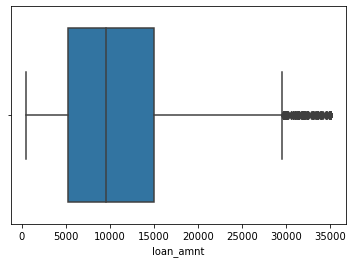

In [57]:
sns.boxplot(loan['loan_amnt'])

plt.show()

In [58]:
loan['funded_amnt'].describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

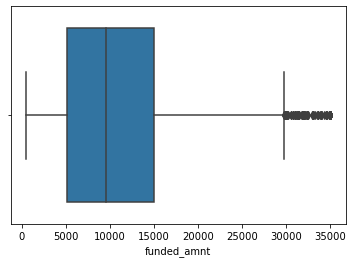

In [59]:
sns.boxplot(loan['funded_amnt'])

plt.show()

In [60]:
loan['funded_amnt_inv'].describe()

count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

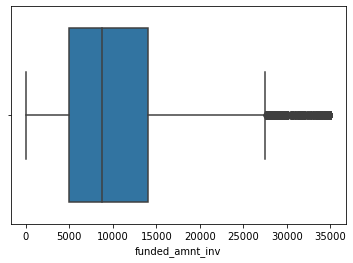

In [61]:
sns.boxplot(loan['funded_amnt_inv'])

plt.show()

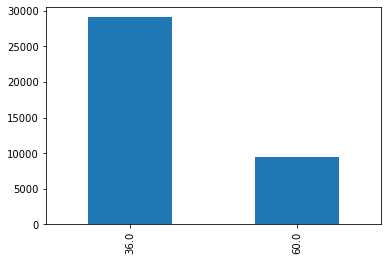

In [62]:

loan['term'].value_counts().plot.bar()
plt.show()


In [63]:
loan['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

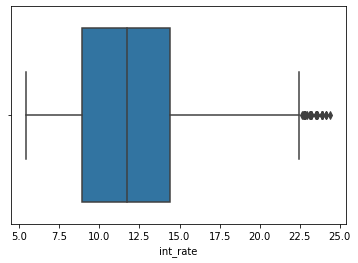

In [64]:
sns.boxplot(loan['int_rate'])

plt.show()

In [65]:
loan['installment'].describe()


count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64

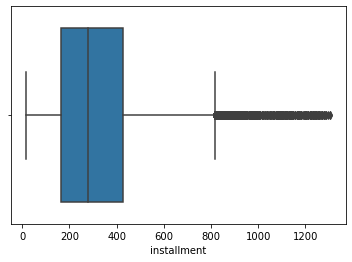

In [66]:
sns.boxplot(loan['installment'])

plt.show()

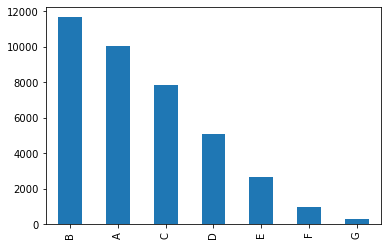

In [67]:
loan['grade'].value_counts().plot.bar()

plt.show()

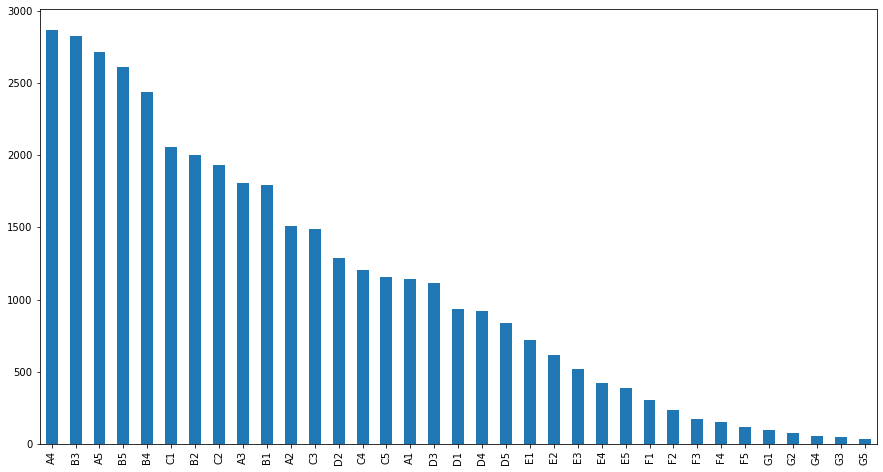

In [68]:
plt.figure(figsize=(15,8))

loan['sub_grade'].value_counts().plot.bar()

plt.show()

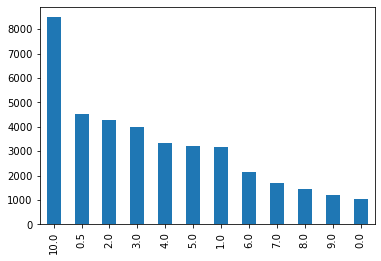

In [69]:
loan['emp_length'].value_counts().plot.bar()

plt.show()

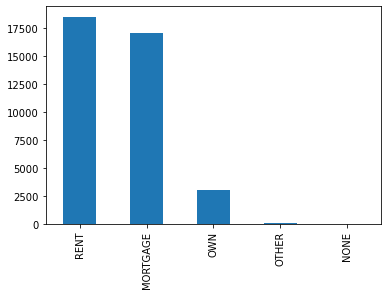

In [70]:
loan['home_ownership'].value_counts().plot.bar()

plt.show()

In [71]:
loan['annual_inc'].describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

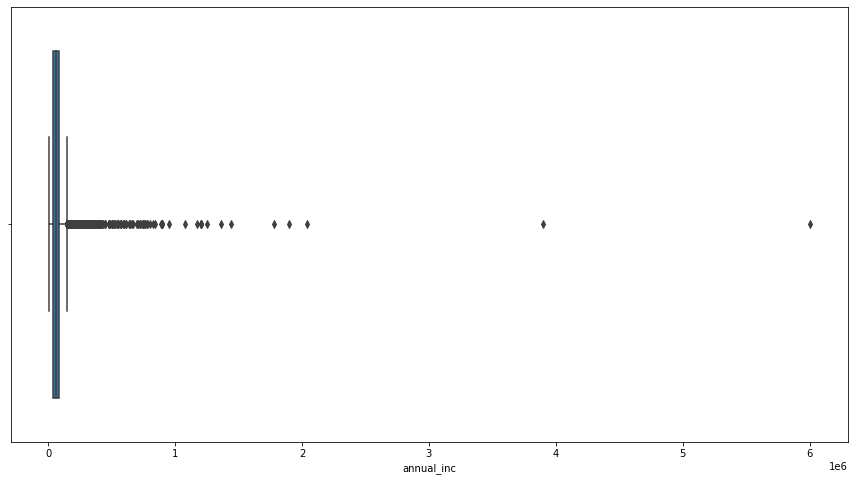

In [72]:
plt.figure(figsize=(15,8))

sns.boxplot(loan['annual_inc'])

plt.show()

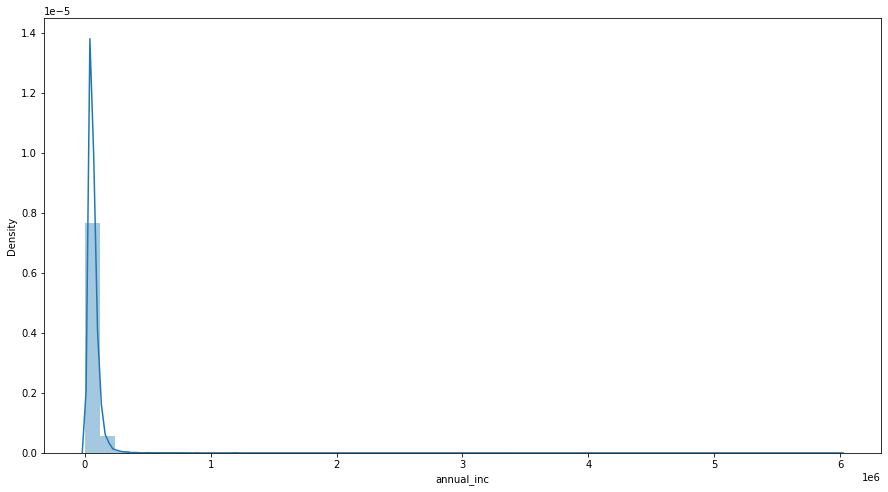

In [73]:
plt.figure(figsize=(15,8))
sns.distplot(loan['annual_inc'])

plt.show()

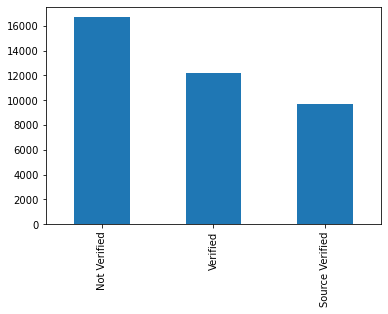

In [74]:
loan['verification_status'].value_counts().plot.bar()

plt.show()

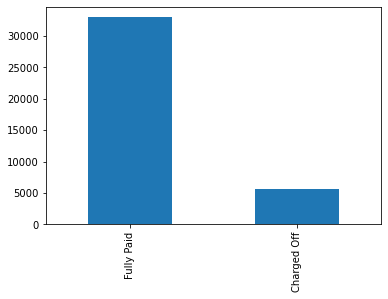

In [75]:
loan['loan_status'].value_counts().plot.bar()

plt.show()

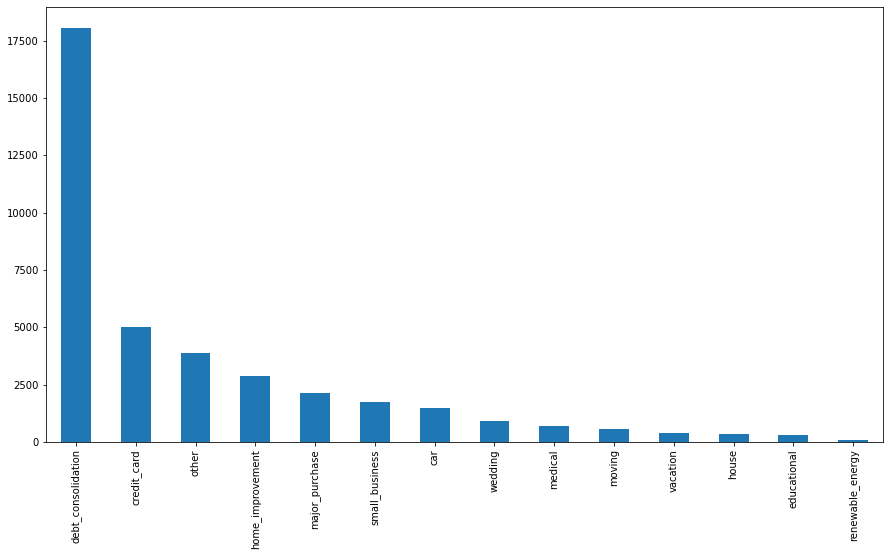

In [76]:
plt.figure(figsize=(15,8))

loan['purpose'].value_counts().plot.bar()

plt.show()

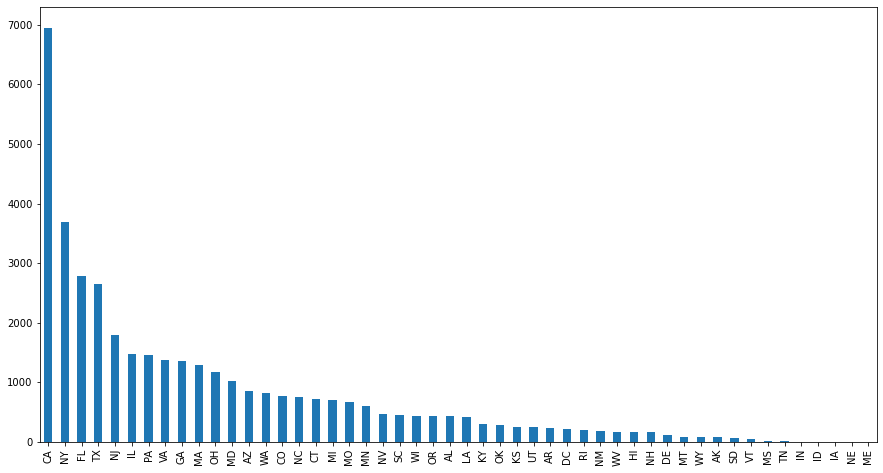

In [77]:
plt.figure(figsize=(15,8))

loan['addr_state'].value_counts().plot.bar()

plt.show()

In [78]:
loan['dti'].describe()

count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64

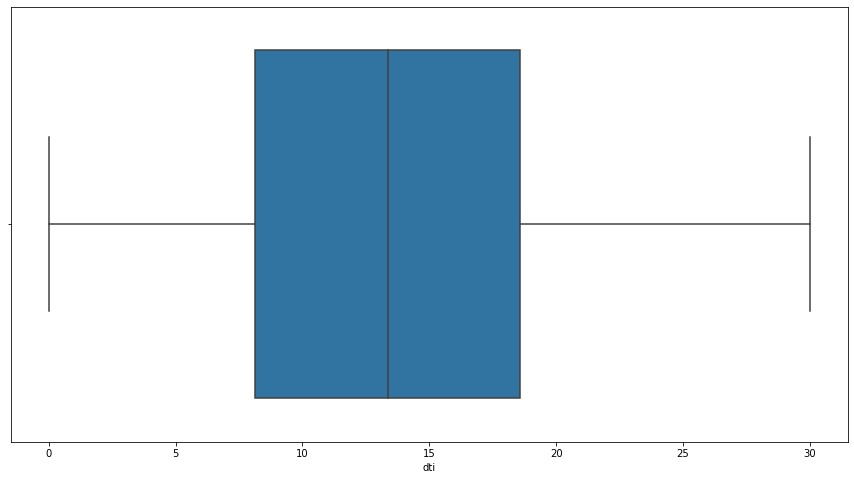

In [79]:
plt.figure(figsize=(15,8))

sns.boxplot(loan['dti'])

plt.show()

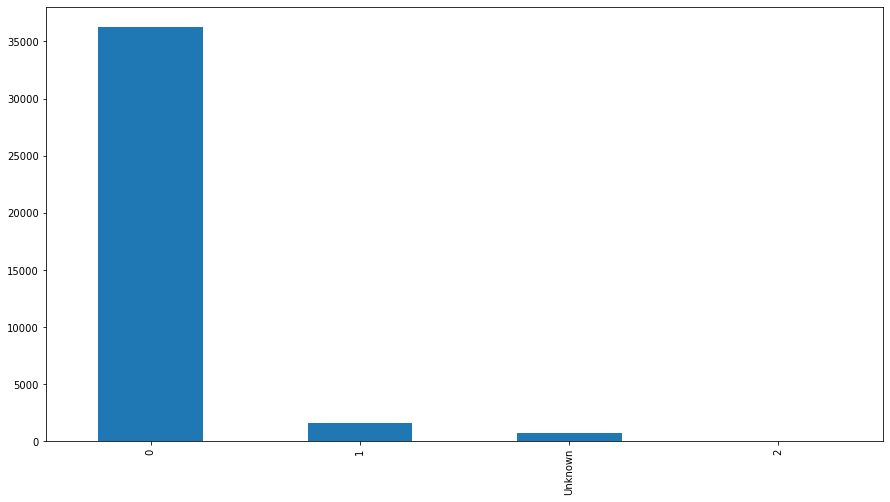

In [80]:
plt.figure(figsize=(15,8))

loan['pub_rec_bankruptcies'].value_counts().plot.bar()

plt.show()

In [81]:
loan.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'funded_amnt_bins', 'int_rate_bins', 'installment_bins',
       'annual_inc_bins', 'dti_bins'],
      dtype='object')

In [82]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,funded_amnt_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins
0,5000.00,5000.00,4975.00,36.00,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0-5000,10-15,0-500,20000-40000,20-30
1,2500.00,2500.00,2500.00,60.00,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0-5000,15-20,0-500,20000-40000,0-10
2,2400.00,2400.00,2400.00,36.00,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0-5000,15-20,0-500,0-20000,0-10
3,10000.00,10000.00,10000.00,36.00,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,5000-10000,10-15,0-500,40000-60000,10-20
5,5000.00,5000.00,5000.00,36.00,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0-5000,5-10,0-500,20000-40000,10-20


## Segmented Univariate Analysis

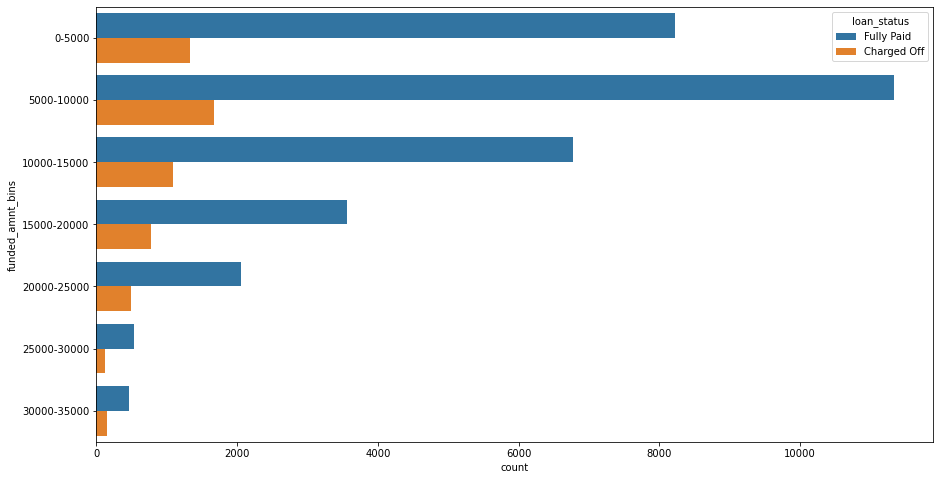

In [83]:
plt.figure(figsize=(15,8))

sns.countplot(y="funded_amnt_bins",data=loan,hue='loan_status')

plt.show()

#### Observation: Funding amount upto 15,0000 has more charged off customers

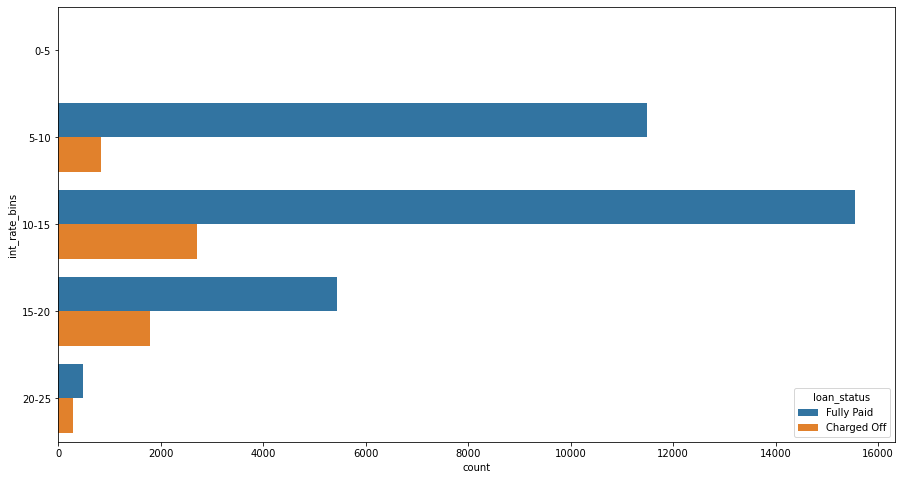

In [84]:
plt.figure(figsize=(15,8))

sns.countplot(y="int_rate_bins",data=loan,hue='loan_status')

plt.show()

#### Observation: Interest rate 10 to 20 has more Charged off customers

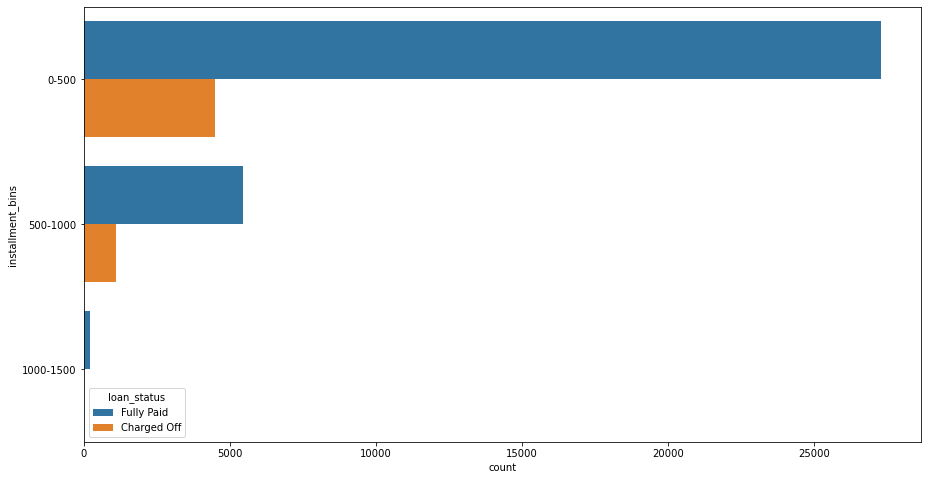

In [85]:
plt.figure(figsize=(15,8))

sns.countplot(y="installment_bins",data=loan,hue='loan_status')

plt.show()

#### Observation: Installment upto 500 is having more charged off customers

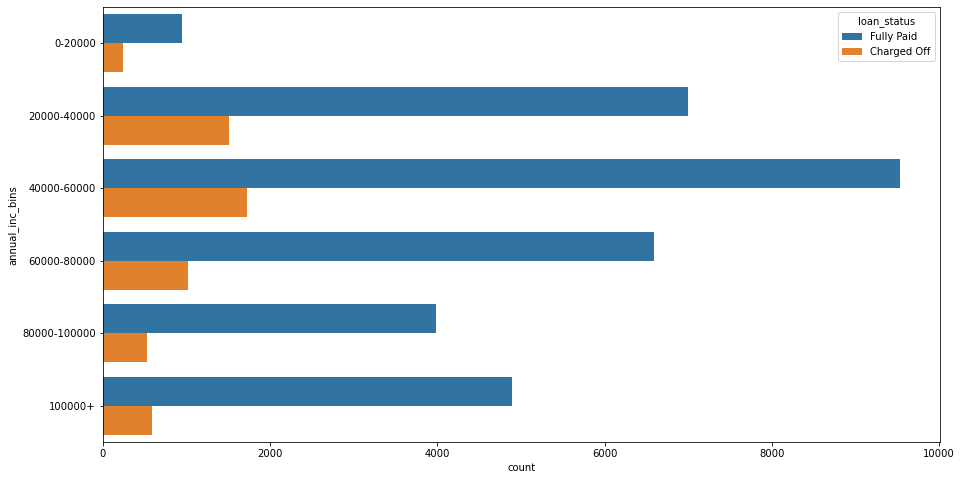

In [86]:
plt.figure(figsize=(15,8))

sns.countplot(y="annual_inc_bins",data=loan,hue='loan_status')

plt.show()

#### Observation: Income range 20,000 to 80,000 has more charged off customers

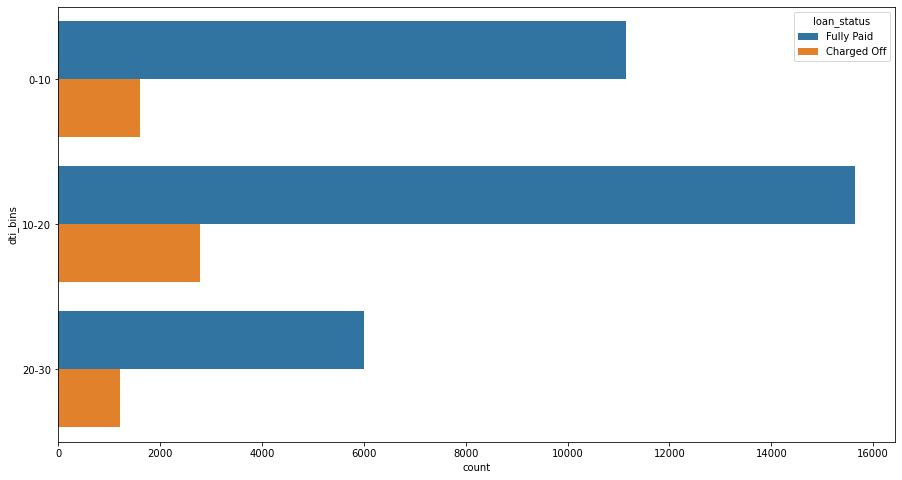

In [87]:
plt.figure(figsize=(15,8))

sns.countplot(y="dti_bins",data=loan,hue='loan_status')

plt.show()

#### Observstion: Dti with 10 to 20 has more charged off customers

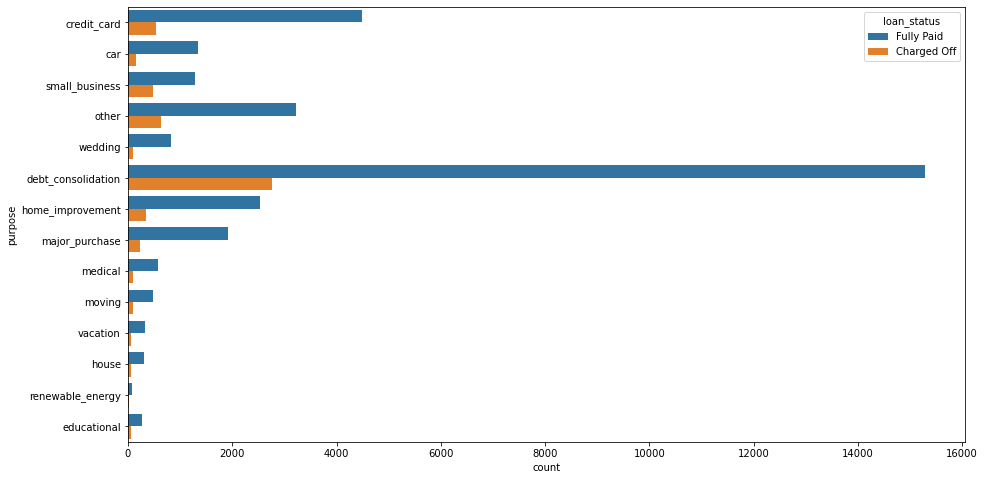

In [88]:
plt.figure(figsize=(15,8))

sns.countplot(y="purpose",data=loan,hue='loan_status')

plt.show()

#### Observation: As the more number loans are provided in debt_consolidation purpose the more "Charged Off" ( Defaulters) are from the same 

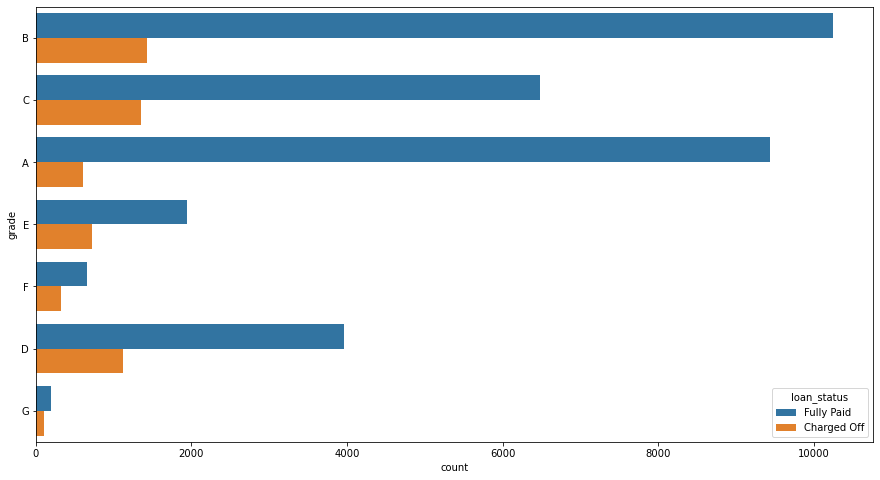

In [89]:
plt.figure(figsize=(15,8))

sns.countplot(y="grade",data=loan,hue='loan_status')

plt.show()

#### Observation: Loan grade B, C, D are having higher number of charged off

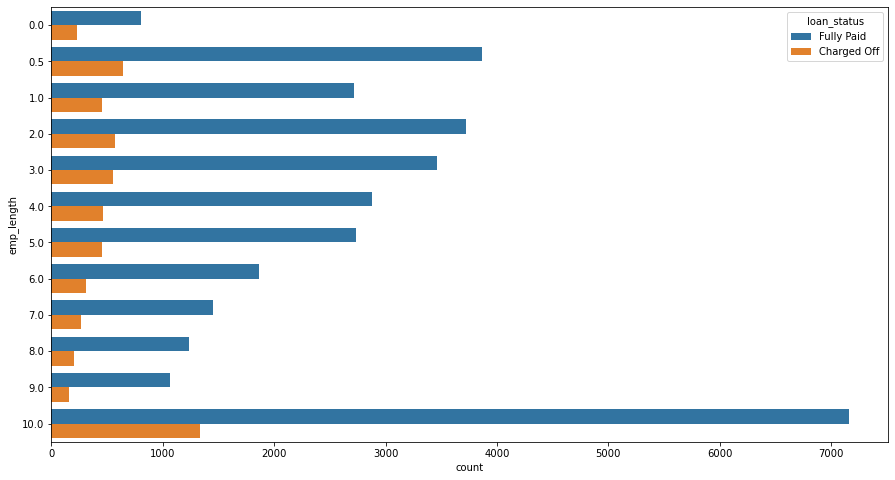

In [90]:
plt.figure(figsize=(15,8))

sns.countplot(y="emp_length",data=loan,hue='loan_status')

plt.show()

#### Observation: The customer whose employment length is 10+ years there "Charged Off" is higher

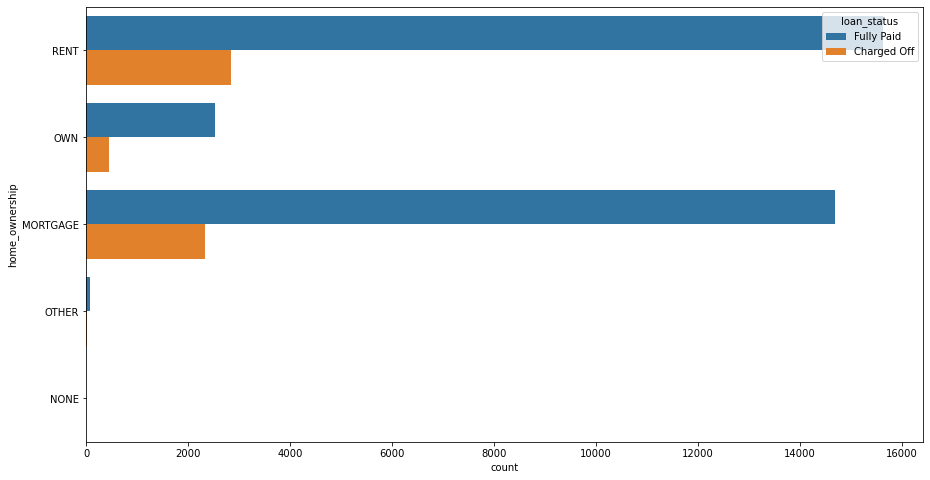

In [91]:
plt.figure(figsize=(15,8))

sns.countplot(y="home_ownership",data=loan,hue='loan_status')

plt.show()

#### Observation: Customer from home ownership as RENT & MORTGAGE are more charged off

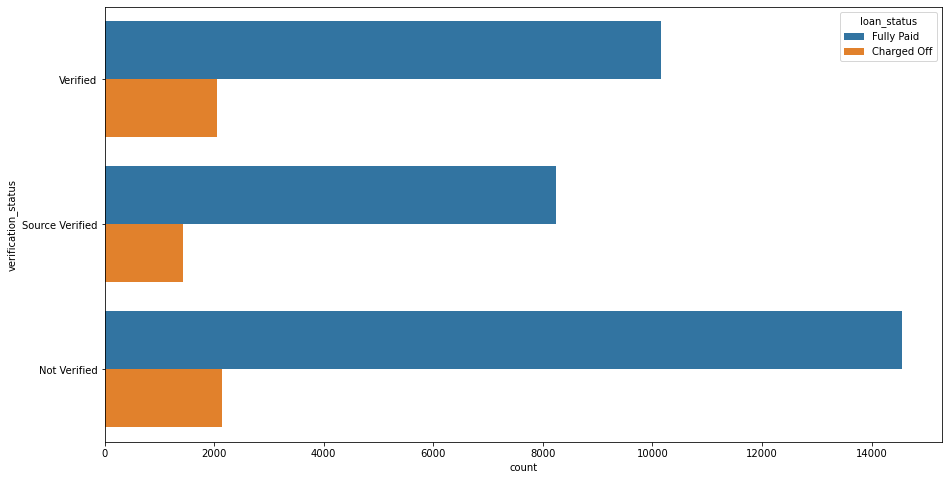

In [92]:
plt.figure(figsize=(15,8))

sns.countplot(y="verification_status",data=loan,hue='loan_status')

plt.show()

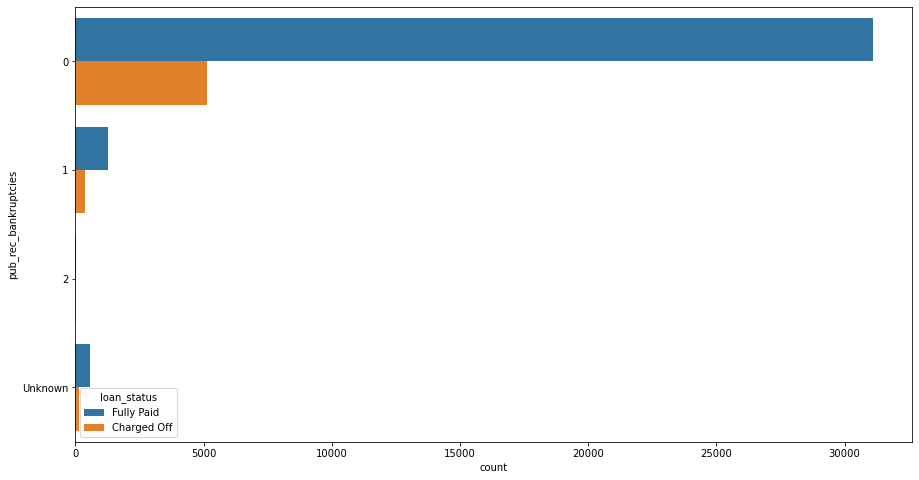

In [93]:
plt.figure(figsize=(15,8))

sns.countplot(y="pub_rec_bankruptcies",data=loan,hue='loan_status')

plt.show()

#### Observation: 0 number of public record bankruptcies has more charged off customers

In [94]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,funded_amnt_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins
0,5000.00,5000.00,4975.00,36.00,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0-5000,10-15,0-500,20000-40000,20-30
1,2500.00,2500.00,2500.00,60.00,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0-5000,15-20,0-500,20000-40000,0-10
2,2400.00,2400.00,2400.00,36.00,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0-5000,15-20,0-500,0-20000,0-10
3,10000.00,10000.00,10000.00,36.00,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,5000-10000,10-15,0-500,40000-60000,10-20
5,5000.00,5000.00,5000.00,36.00,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0-5000,5-10,0-500,20000-40000,10-20


## Bivariate Analysis 

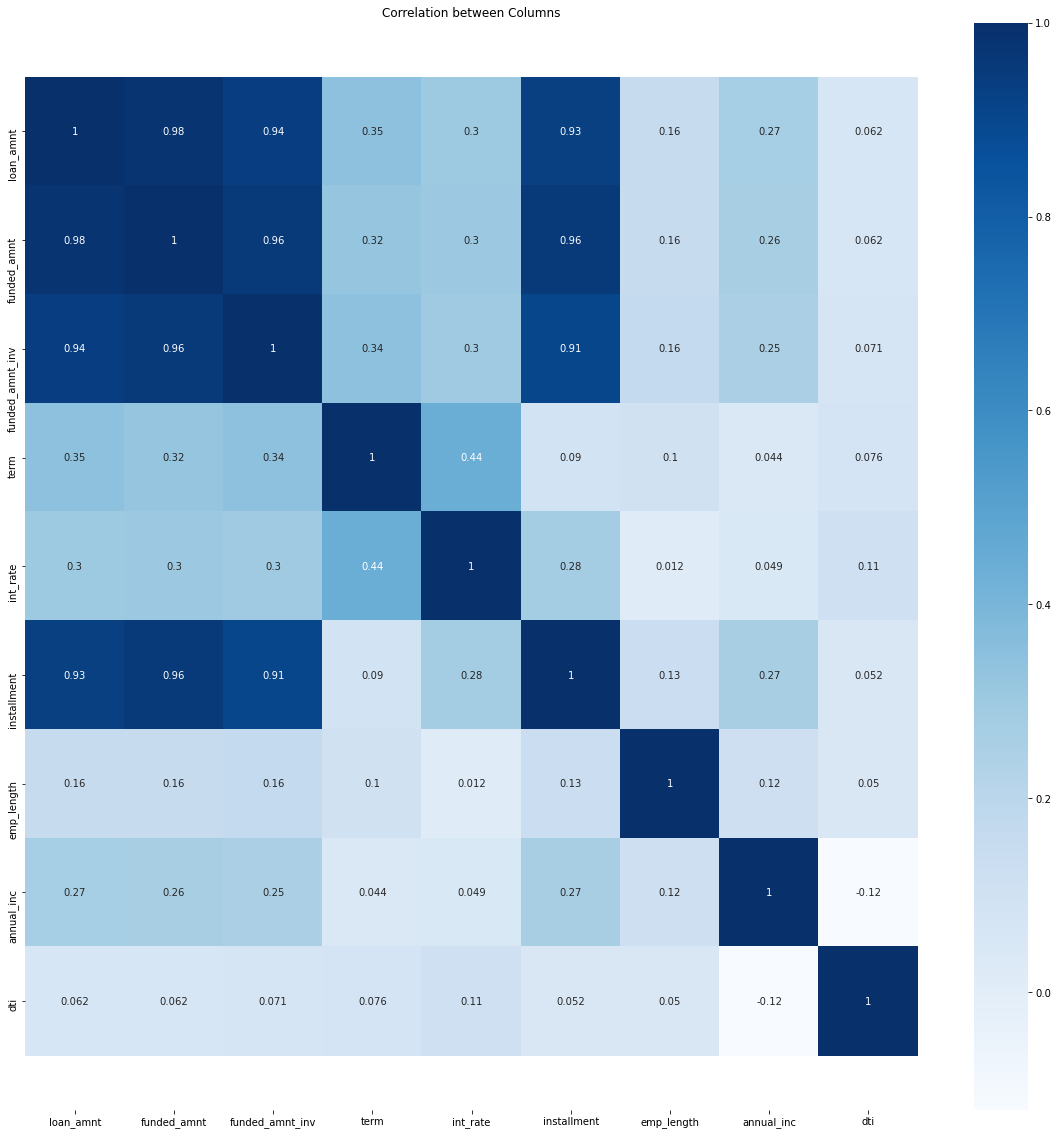

In [95]:
corr_matrix = loan.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

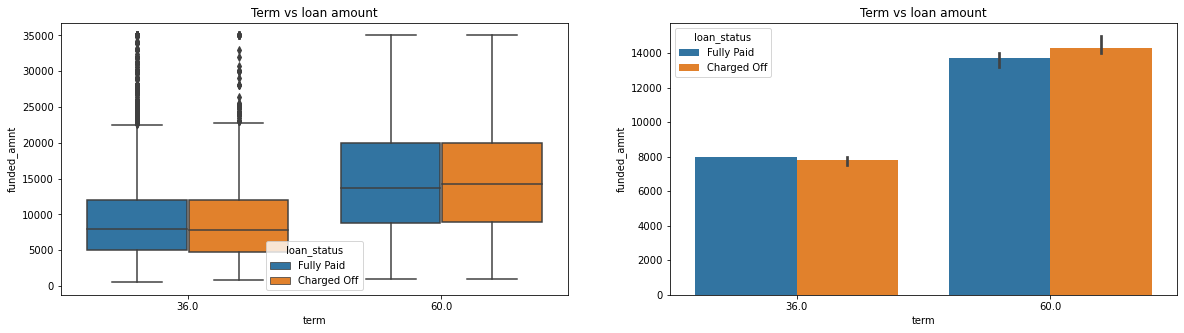

In [96]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='funded_amnt', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='funded_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()


#### Observations:
Loan amount is not a decider for defaults in both 36 adn 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

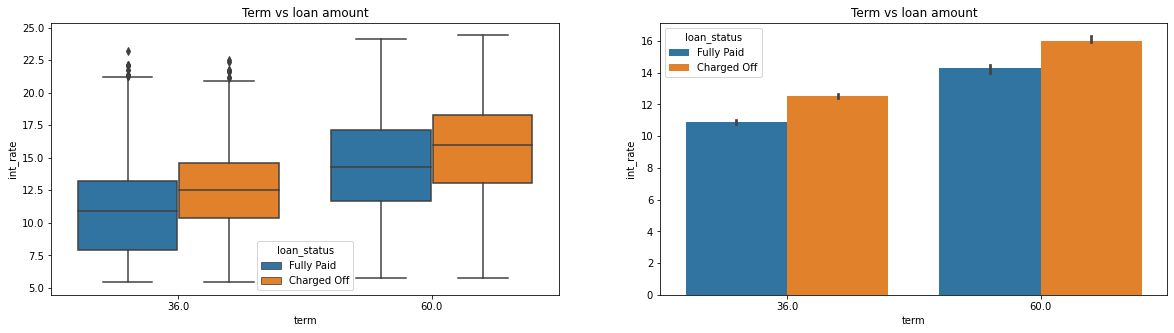

In [97]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()


#### Observations
Higher the interest rate higher the Defaulters

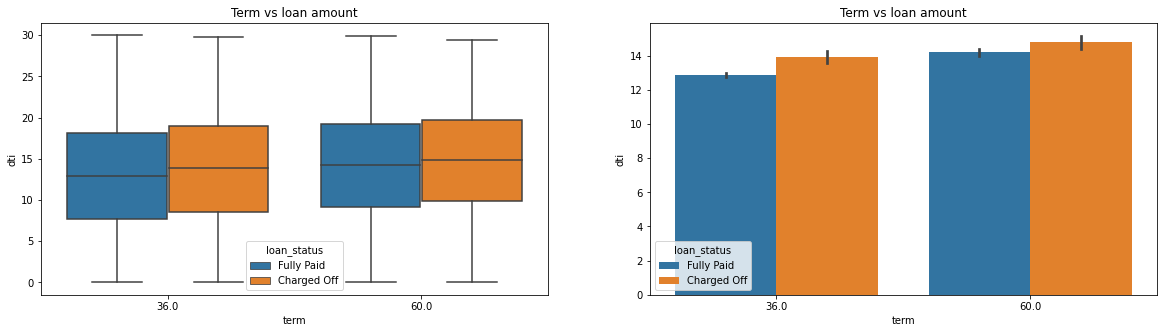

In [98]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()


#### Observations:
For DTI the defaulters are higher than fully paid

### Grade

In [99]:
#Sorting Grades from A to G
grade_order = loan.grade.unique()
grade_order.sort()

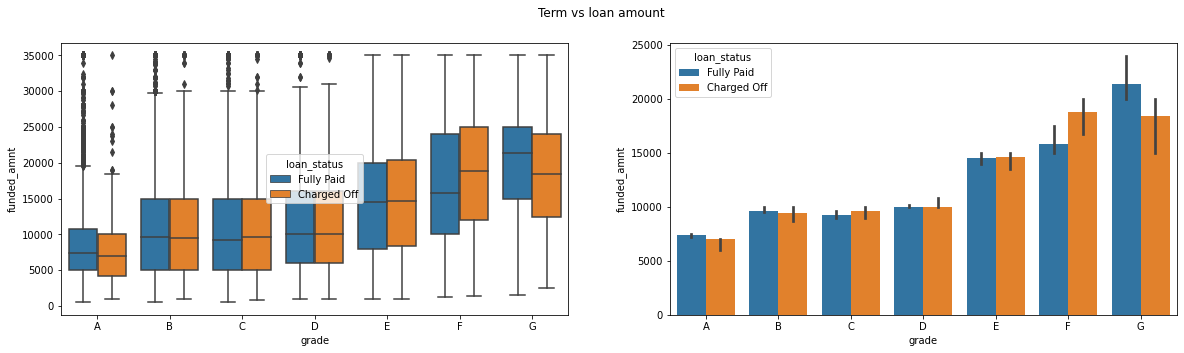

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='funded_amnt', hue='loan_status', data=loan, order = grade_order)
plt.subplot(122)
sns.barplot(x='grade', y='funded_amnt', hue='loan_status', data=loan, estimator=np.median, order = grade_order)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observation :

Lower the grade more prone to default the loans

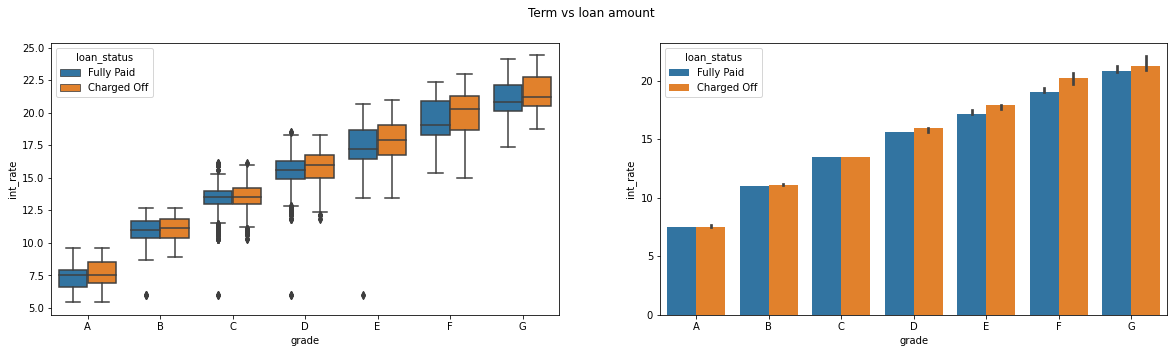

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_order)
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan, estimator=np.median, order = grade_order)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observation:

As the grade decreases the interest increase and there are more prone to default the loan

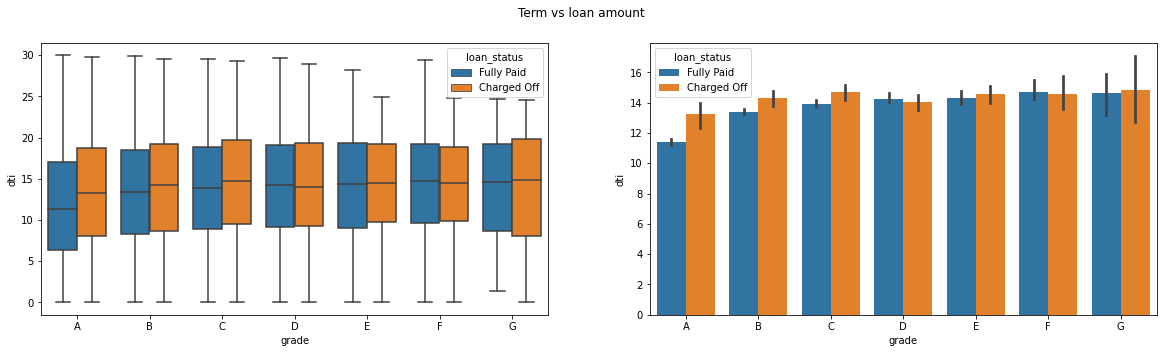

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan, order = grade_order)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan, estimator=np.median, order = grade_order)
plt.suptitle('Term vs loan amount')
plt.show()

#### Observation:

There is not much of the observation using dti

### Employment Length

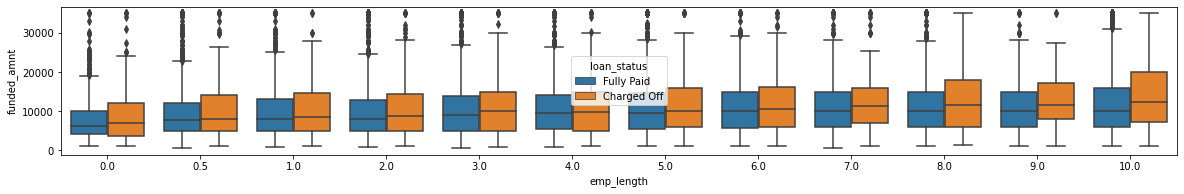

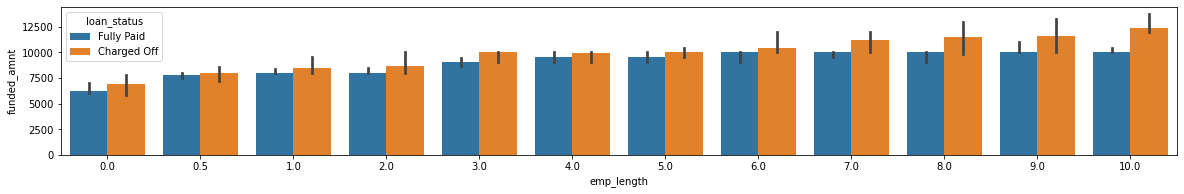

In [103]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='funded_amnt', hue='loan_status', data=loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='funded_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.show()

#### Observation:

Borrowers with more employment length have more higher loan they are thend to default more

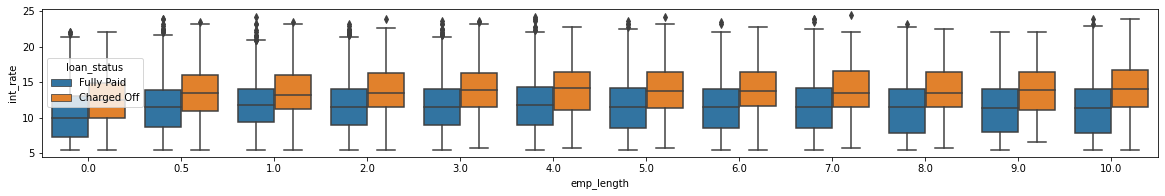

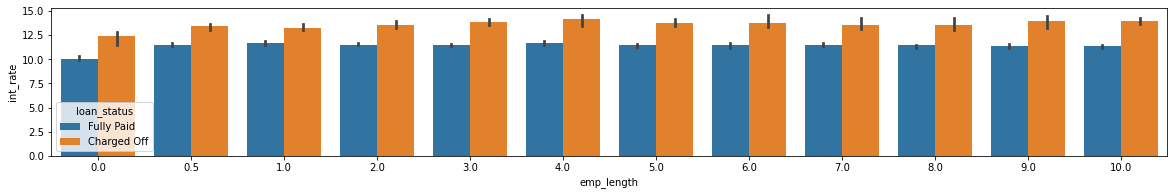

In [104]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.show()

#### Observation:

Irrespective with employment length higher the interest rate the defaulters are higher

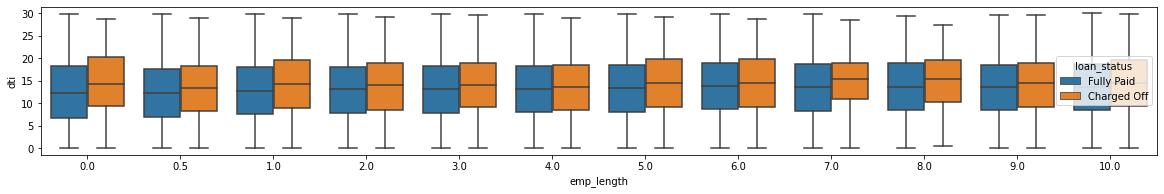

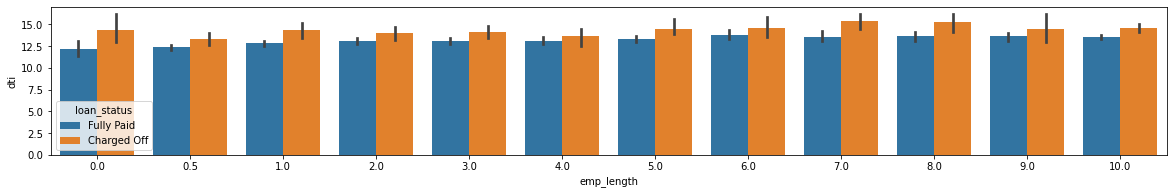

In [105]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.show()

#### Observations:
Employment Length and DTI are not showing any patterns towards defaults.

## Home Ownership

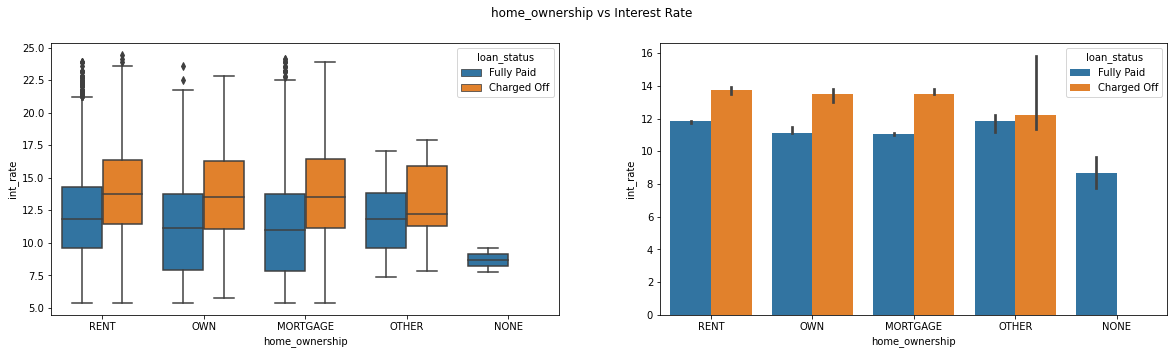

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

#### Observation:

Irrespective of the home ownership higher the interest rate there are more changes to default

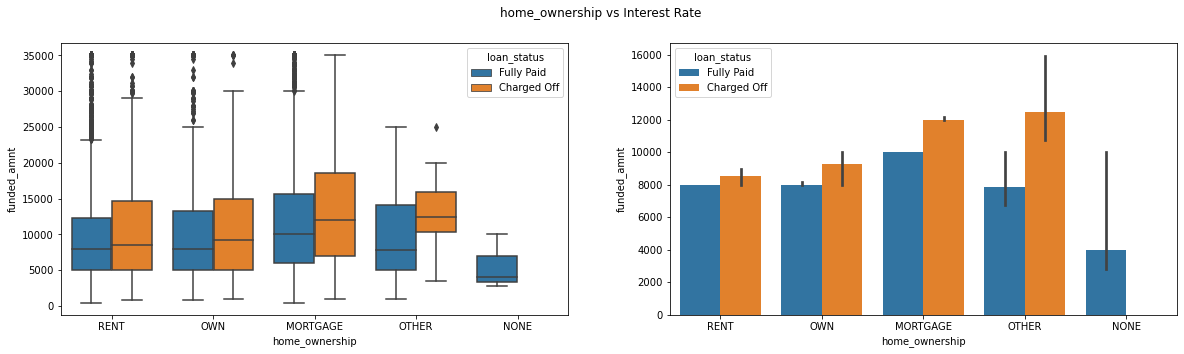

In [107]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='funded_amnt', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='funded_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

#### Observation:

Higher the funded amount more changes to default

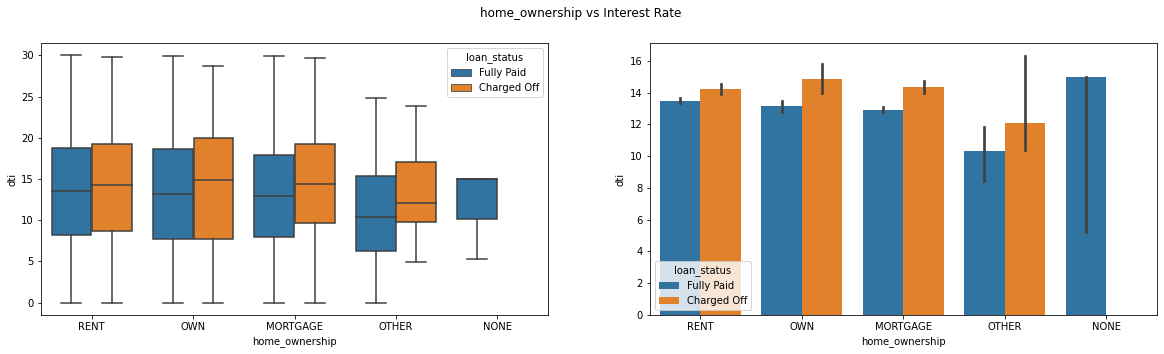

In [108]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

## Address State

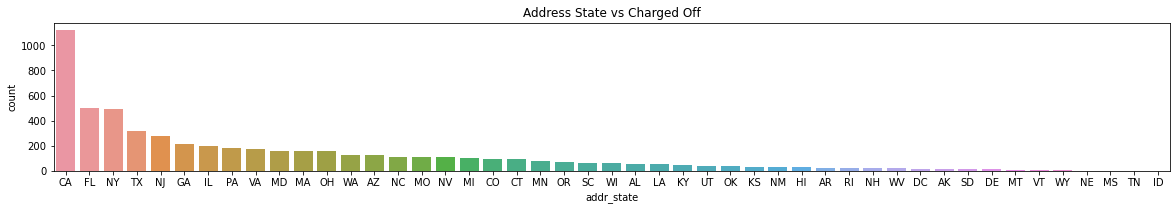

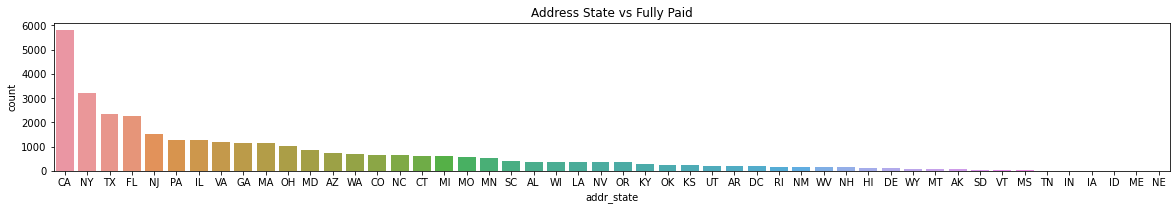

In [109]:
charged_off_df = loan[loan.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = loan[loan.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

#### Observations:
More number of borrowers defaulted in CA , FL and NY states.

## Verfication Status

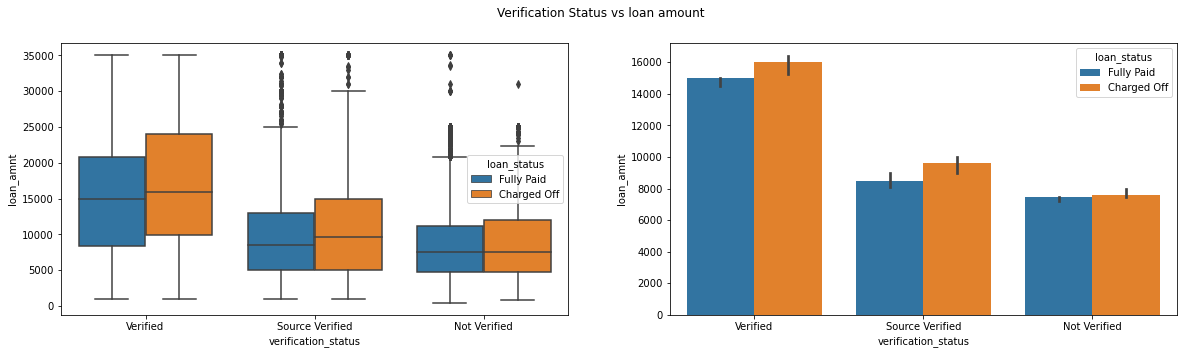

In [110]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

#### Observation:

here is a slight increase in loan amount for verified and source verified loan when they are defaulted.

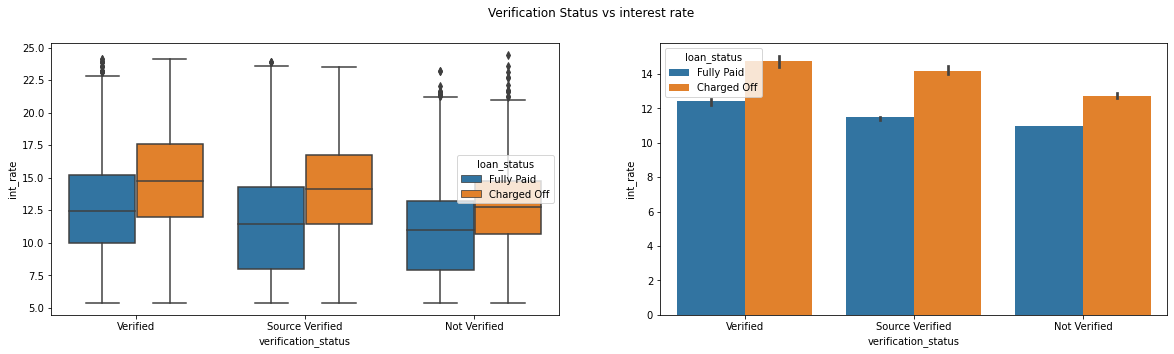

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

#### Observastion:
Irrespective of verification status higher the interest rate higher chances of default

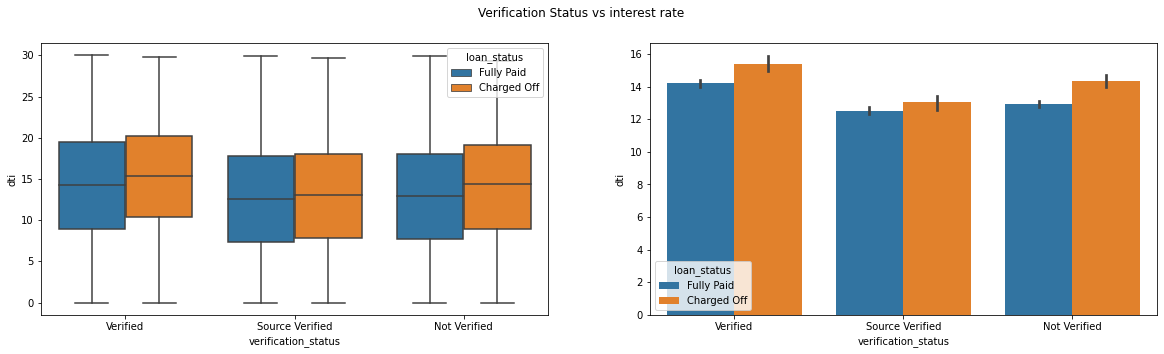

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

## Purpose

<Figure size 432x288 with 0 Axes>

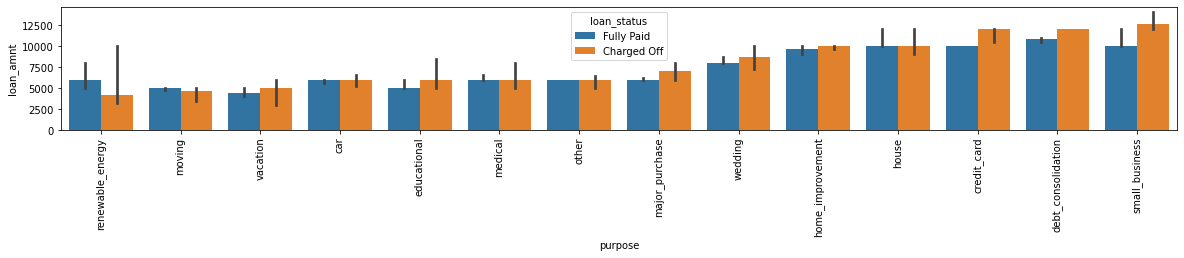

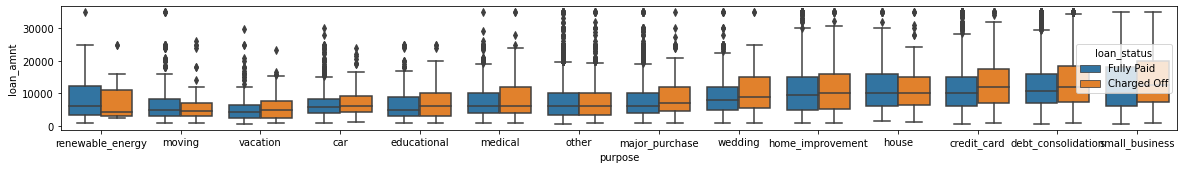

In [113]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

#### Observation:

Small business are defaulting more loans

<Figure size 432x288 with 0 Axes>

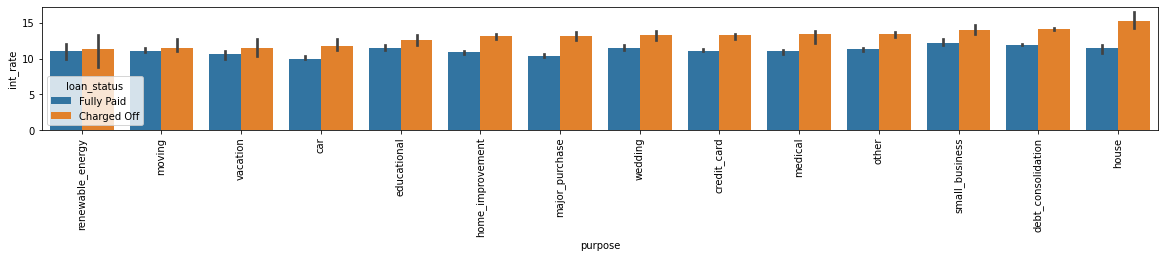

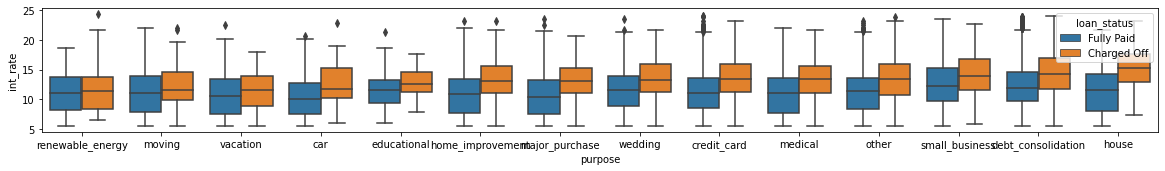

In [114]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose)
plt.show()

#### Observation:
Higher the interest rate higher the default

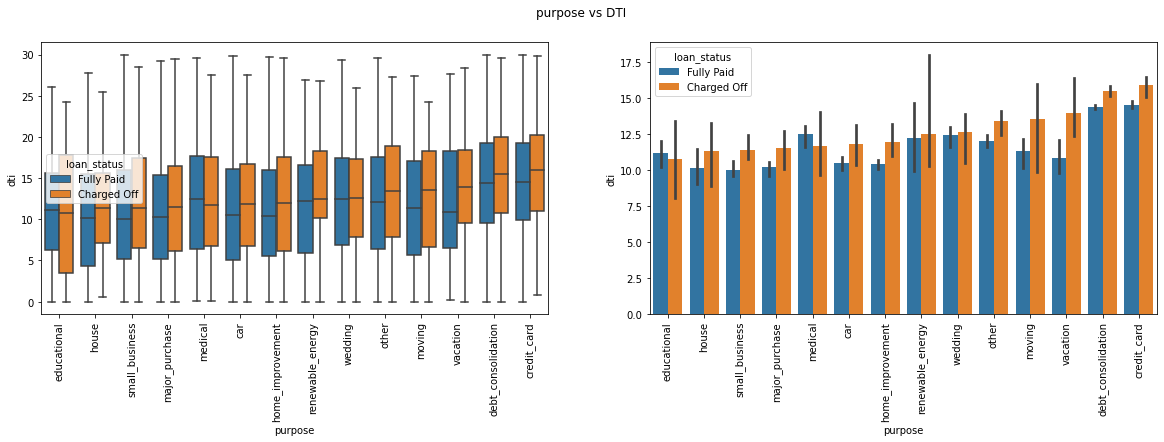

In [115]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

# Summary

## 1. Higher the interest rate there is more possibility of defaulting
## 2. More number of borrowers defaulted in CA , FL and NY states.
## 3. Small business are defaulting more loans
## 4. Higher the funded amount more changes to default
## 5. Borrowers with more employment length have more higher loan they are thend to default more
## 6. Lower the grade more chances to default